<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-RigobertoVega/blob/main/Actividad_Semanal_5_Repaso_Transformaci%C3%B3n_y_reducci%C3%B3n_de_dimensiones_RigobertoVegaEscudero_A01793132.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

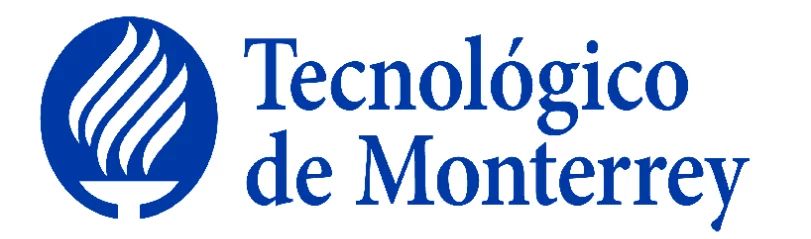

#**Actividad Semanal -- 5 Repaso Transformación y reducción de dimensiones**

##Rigoberto Vega Escudero, A01793132

##Materia: Ciencia De Datos

##Profesor:PhD. María de la Paz Rico Fernandez

##27/Octubre/2022

# Bienvenido al notebook
#Repaso de Reducción de dimensiones
El objetivo es que entendamos de una manera visual, que es lo que pasa cuando nosotros seleccionamos cierto número de componentes principales o % de variabilidad  de una base de datos.

Primero entenderemos, que pasa adentro de PCA que se basa en lo siguiente a grandes razgos:

**Análisis de Componentes Principales**

El análisis de datos multivariados involucra determinar transformaciones lineales que ayuden
a entender las relaciones entre las características importantes de los datos. La idea central del Análisis de Componentes Principales (PCA) es reducir las dimensiones de un conjunto de datos que presenta variaciones correlacionadas, reteniendo una buena proporción de la variación presente en dicho conjunto. Esto se logra obteniendo la transformación a un nuevo conjunto de variables: los componentes principales (PC). Cada PC es una combinación lineal con máxima varianza en dirección ortogonal a los demás PC.


![title](https://miro.medium.com/max/720/1*XGaA7KWUlhWZLIezYEBIHA.gif)


Para entender un poco más de PCA y SVD, visita el siguiente link:
*Truco: Prueba entrar con tu cuenta del tec :)*

https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8


Basicamente, vamos a seguir los siguientes pasos:

1. Obtener la covarianza. OJO: X tiene sus datos centrados :)

![title](https://miro.medium.com/max/194/1*92t9OuqxIG0YpJXsNNgI4A.png)

2. Los componentes principales se van a obtener de la eigen descomposicion de la matriz de covarianza.

![title](https://miro.medium.com/max/260/1*c1S0_26A8RxEQQUVyMp5Vw.png)

3. Para la reducción de dimensiones vamos a seleccionar k vectores de W y proyectaremos nuestros datos.

![title](https://miro.medium.com/max/214/1*jnj2YMpWIApnCzxRU_zjfg.png)

![title](https://miro.medium.com/max/720/1*ba0XpZtJrgh7UpzWcIgZ1Q.jpeg)






# Ejercicio 1, Descomposición y composición
***Descomposición***

Encuentra los eigenvalores y eigenvectores de las siguientes matrices

$A = \begin{pmatrix} 3,0,2 \\ 3,0,-2 \\ 0,1,1 \end{pmatrix}$
$A2 = \begin{pmatrix} 1,3,8 \\ 2,0,0 \\ 0,0,1 \end{pmatrix}$
$A3 = \begin{pmatrix} 5,4,0 \\ 1,0,1 \\ 10,7,1 \end{pmatrix}$

y reconstruye la matriz original a traves de las matrices 
$WDW^{-1}$ (OJO. Esto es lo mismo de la ecuación del paso 2 solo le cambiamos la variable a la matriz diagonal)




# Eigenvalores y eigenvectores

In [ ]:
###-----------------EJEMPLO DE EIGENVALORES
import numpy as np
from numpy import array
from numpy.linalg import eig
# define la matriz
A = array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print("-------Matriz original-------")
print(A)
print("-----------------------------")
# calcula la eigendescomposición
values, vectors = eig(A)
print(values) #D
print(vectors) #W

#Ejemplo de reconstrucción


values, vectors = np.linalg.eig(A)

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)
#la matriz B tiene que dar igual a A
#reconstruye la matriz 
print("-------Matriz reconstruida-------")
# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
#ojo, estas multiplicando matrices, no escalares ;)
#TU CODIGO AQUI-------------------------------------
B = np.dot(np.dot(W, D), Winv)
print(B.real)
print("-----------------------------")

-------Matriz original-------
[[1 2 3]
 [4 5 6]
 [7 8 9]]
-----------------------------
[ 1.61168440e+01 -1.11684397e+00 -1.30367773e-15]
[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]
-------Matriz reconstruida-------
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
-----------------------------


In [ ]:
#Matriz 1
A = array([[3, 0, 2], [3, 0, -2], [0, 1, 1]])
print("-------Matriz original-------")
print(A)
print("-----------------------------")

valuesA, vectorsA = np.linalg.eig(A)
print(f'Vectores (D):\n{vectorsA}')
print("-----------------------------")
print(f'Valores (W):\n{valuesA}')

WA = vectorsA
WinvA = np.linalg.inv(WA)
DA = np.diag(valuesA)
print("\n-------Matriz reconstruida-------")
BA = np.dot(np.dot(WA, DA), WinvA)
print(BA.round(2).real)
print('-----------------------')

-------Matriz original-------
[[ 3  0  2]
 [ 3  0 -2]
 [ 0  1  1]]
-----------------------------
Vectores (D):
[[-0.80217543+0.j         -0.04746658+0.2575443j  -0.04746658-0.2575443j ]
 [-0.55571339+0.j          0.86167879+0.j          0.86167879-0.j        ]
 [-0.21839689+0.j         -0.16932106-0.40032224j -0.16932106+0.40032224j]]
-----------------------------
Valores (W):
[3.54451153+0.j         0.22774424+1.82582815j 0.22774424-1.82582815j]

-------Matriz reconstruida-------
[[ 3.  0.  2.]
 [ 3.  0. -2.]
 [ 0.  1.  1.]]
-----------------------


In [ ]:
#Matriz 2
A2 = array([[1, 3, 8], [2, 0, 0], [0, 0, 1]])
print("-------Matriz original-------")
print(A2)
print("-----------------------------")

valuesA2, vectorsA2 = np.linalg.eig(A2)
print(f'Vectores (D):\n{vectorsA2}')
print("-----------------------------")
print(f'Valores (W):\n{valuesA}2')

WA2 = vectorsA2
WinvA2 = np.linalg.inv(WA2)
DA2 = np.diag(valuesA2)
print("\n-------Matriz reconstruida-------")
BA2 = np.dot(np.dot(WA2, DA2), WinvA2)
print(BA2.round(2).real)
print('-----------------------')

-------Matriz original-------
[[1 3 8]
 [2 0 0]
 [0 0 1]]
-----------------------------
Vectores (D):
[[ 0.83205029 -0.70710678 -0.42399915]
 [ 0.5547002   0.70710678 -0.8479983 ]
 [ 0.          0.          0.31799936]]
-----------------------------
Valores (W):
[3.54451153+0.j         0.22774424+1.82582815j 0.22774424-1.82582815j]2

-------Matriz reconstruida-------
[[1. 3. 8.]
 [2. 0. 0.]
 [0. 0. 1.]]
-----------------------


In [ ]:
#Matriz 3
A3 = array([[5, 4, 0], [1, 0, 1], [10, 7, 1]])
print("-------Matriz original-------")
print(A3)
print("-----------------------------")

valuesA3, vectorsA3 = np.linalg.eig(A3)
print(f'Vectores (D):\n{vectorsA3}')
print("-----------------------------")
print(f'Valores (W):\n{valuesA3}')

WA3 = vectorsA3
WinvA3 = np.linalg.inv(WA3)
DA3 = np.diag(valuesA3)
print("\n-------Matriz reconstruida-------")
BA3 = np.dot(np.dot(WA3, DA3), WinvA3)
print(BA3.round(2).real)
print('-----------------------')

-------Matriz original-------
[[ 5  4  0]
 [ 1  0  1]
 [10  7  1]]
-----------------------------
Vectores (D):
[[ 0.3975395   0.55738222  0.57580768]
 [ 0.18800348 -0.72657211 -0.81728644]
 [ 0.89811861 -0.40176864 -0.02209943]]
-----------------------------
Valores (W):
[ 6.89167094 -0.214175   -0.67749594]

-------Matriz reconstruida-------
[[ 5.  4. -0.]
 [ 1. -0.  1.]
 [10.  7.  1.]]
-----------------------


**¿Qué significa  reducir dimensiones?**

Esto será cuando proyectemos a ese espacio de los componentes principales pero no los seleccionemos todos, solo los más importantes y viajemos de regreso a nuestras unidades a través de una proyección.

Es decir:
Unidades-PC
PC-Unidades

Veamoslo gráficamente, ¿qué pasa con esa selección de los PCs y su efecto?.


Para ello usaremos Singular Value Descomposition (SVD).



# Singular Value Descomposition(SVD)

Es otra descomposición que tambien nos ayudara a reducir dimensiones.

<img src="https://miro.medium.com/max/720/1*6wkgGgBy2NLVmRVOw8K86w.png" width="300">



#Ejercicio 2
Juega con Lucy, una cisne, ayudala a encontrar cuantos valores singulares necesita para no perder calidad a través de SVD. Posteriormente usa 3 imágenes de tu preferencia y realiza la misma acción :D

A esto se le llama **compresión de imagenes** :o

[72. 73. 74. ... 48. 47. 47.]


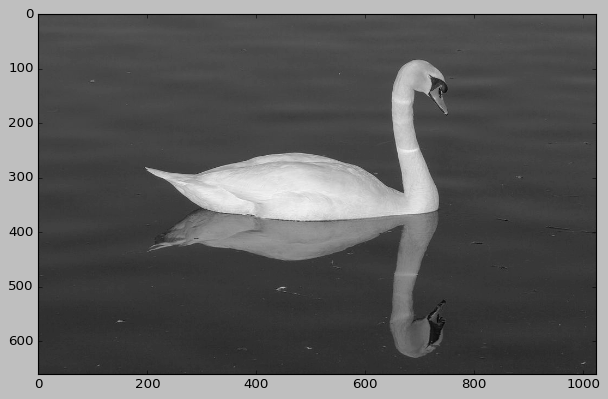

<PIL.Image.Image image mode=LA size=1024x660 at 0x7FFB67C84CD0>


In [ ]:
from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2015/03/Cisne.jpg')).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [ ]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape


(660, 1024)

In [ ]:
U.shape

(660, 660)

In [ ]:
V.shape

(1024, 1024)

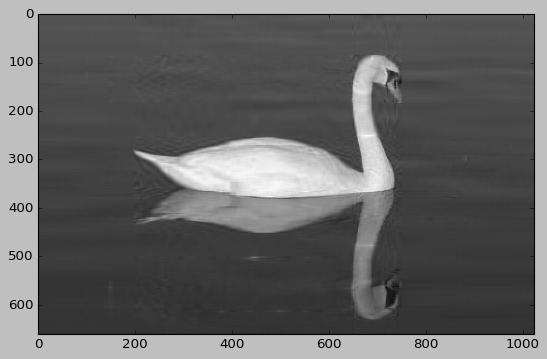

Felicidades la imagen está comprimida


In [ ]:
#Cuantos valores crees que son necesarios?
#A=U*D*V
#aqui los elegiremos---------------------------
# por las dimensiones de este caso en particular 
#iremos de 0-660, siendo 660 como normalmente están los datos
#con 50 podemos observar que Lucy se ve casi igual, es decir conservamos aquello que en 
# realidad estaba aportando a la imagen en este caso :D por medio de la variabilidad 
#juega con el valor nvalue y ve que pasa con otros valores
nvalue = 30
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
#ve las dimensiones de la imagen y su descomposicion
#660x1024= U(660X660)D(660X1024)V(1024x1024)
        #=U(660Xnvalues)D(nvaluesXnvalue)V(nvaluesx1024)

        #=U(660X50)(50X50)(50X1024)
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

¡Ahora es tu turno!, comprime 3 imagenes

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###Imagen 1

[255. 255. 255. ... 255. 255. 255.]


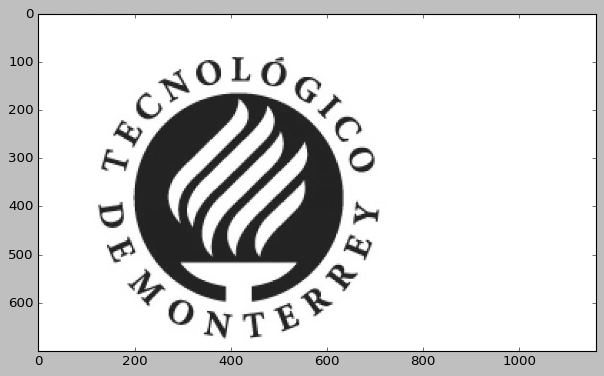

<PIL.Image.Image image mode=LA size=1160x700 at 0x7FFB5EBF1090>


In [ ]:
#imagen 1
plt.style.use('classic')
img1 = Image.open('/content/drive/MyDrive/Colab Notebooks/Actividad Semana 5/Logo Tec.jpg').convert('LA')
imggray1 = img1.convert('LA')
imgmat1 = np.array(list(imggray1.getdata(band=0)),float)

print(imgmat1)

imgmat1.shape = (imggray1.size[1],imggray1.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat1,cmap='gray')
plt.show()
print(img1)



In [ ]:
#obtenemos los las matrices U y V de la imagen1
U1,D1,V1 = np.linalg.svd(imgmat1)
print(imgmat1.shape)
print(U1.shape)
print(V1.shape)

(700, 1160)
(700, 700)
(1160, 1160)


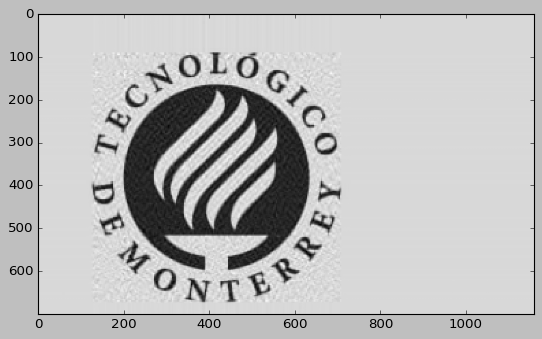

Felicidades la primera imagen1 está comprimida


In [ ]:
#Este valor es el que nos ayudara a comprimir los pixeles de la imagen1.
nvalue = 50
reconstimg1 = np.matrix(U1[:,:nvalue])*np.diag(D1[:nvalue])*np.matrix(V1[:nvalue,:])
#ve las dimensiones de la imagen1 y su descomposicion
#700x1160= U(700X700)D(700X1160)V(1160x1160)
        #=U(700Xnvalues)D(nvaluesXnvalue)V(nvaluesx1160)

        #=U(700X50)(50X50)(50X1160)
plt.imshow(reconstimg1,cmap='gray')
plt.show()
print("Felicidades la primera imagen1 está comprimida")

Imagen Original vs Comprimida 



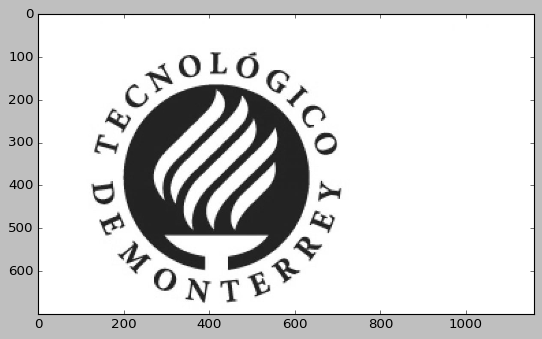

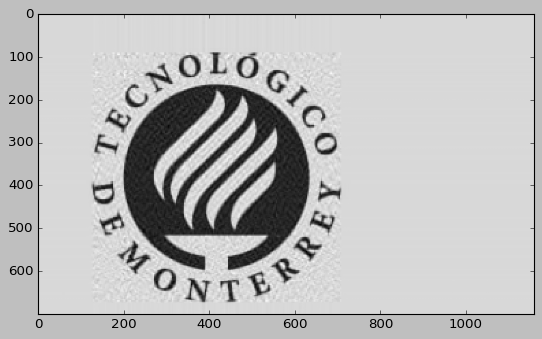

In [ ]:
print("Imagen Original vs Comprimida \n")
plt.imshow(imgmat1,cmap='gray')
plt.show()
plt.imshow(reconstimg1,cmap='gray')
plt.show()

###Imagen 2

[255. 255. 255. ... 255. 255. 255.]


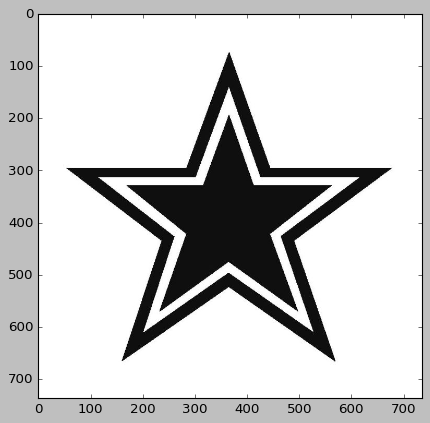

<PIL.Image.Image image mode=LA size=736x736 at 0x7FFB61724F90>


In [ ]:
#imagen 2
plt.style.use('classic')
img2 = Image.open('/content/drive/MyDrive/Colab Notebooks/Actividad Semana 5/Dallas.jpg').convert('LA')

imggray2 = img2.convert('LA')
imgmat2 = np.array(list(imggray2.getdata(band=0)),float)

print(imgmat2)

imgmat2.shape = (imggray2.size[1],imggray2.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat2,cmap='gray')
plt.show()
print(img2)

In [ ]:
#obtenemos los las matrices U y V de la imagen2
U2,D2,V2 = np.linalg.svd(imgmat2)
print(imgmat2.shape)
print(U2.shape)
print(V2.shape)

(736, 736)
(736, 736)
(736, 736)


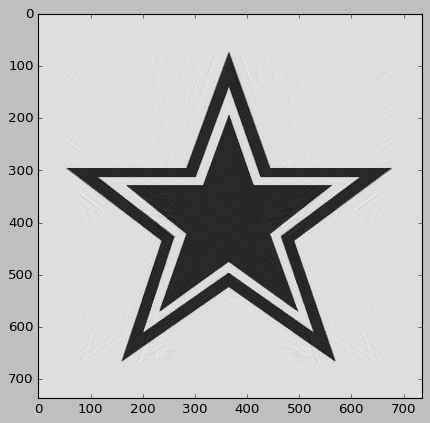

Felicidades la primera imagen2 está comprimida


In [ ]:
#Este valor es el que nos ayudara a comprimir los pixeles de la imagen2.
nvalue = 100
reconstimg2 = np.matrix(U2[:,:nvalue])*np.diag(D2[:nvalue])*np.matrix(V2[:nvalue,:])
#ve las dimensiones de la imagen2 y su descomposicion
#700x1160= U(736X736)D(736X736)V(736x736)
        #=U(736Xnvalues)D(nvaluesXnvalue)V(nvaluesx736)

        #=U(736X100)(100X100)(100X736)
plt.imshow(reconstimg2,cmap='gray')
plt.show()
print("Felicidades la primera imagen2 está comprimida")

Imagen Original vs Comprimida 



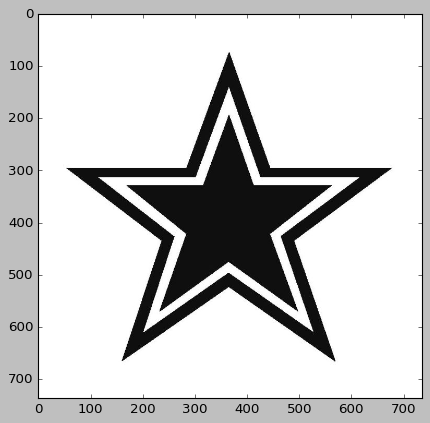

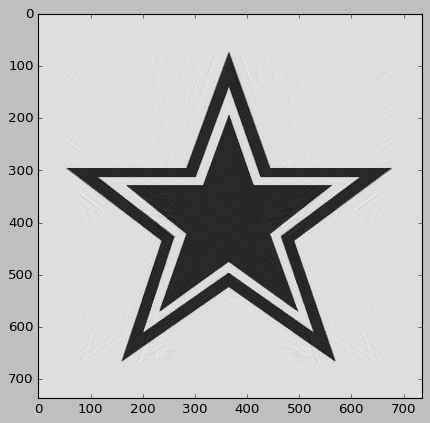

In [ ]:
print("Imagen Original vs Comprimida \n")
plt.imshow(imgmat2,cmap='gray')
plt.show()
plt.imshow(reconstimg2,cmap='gray')
plt.show()

###Imagen 3

[255. 255. 255. ... 255. 255. 255.]


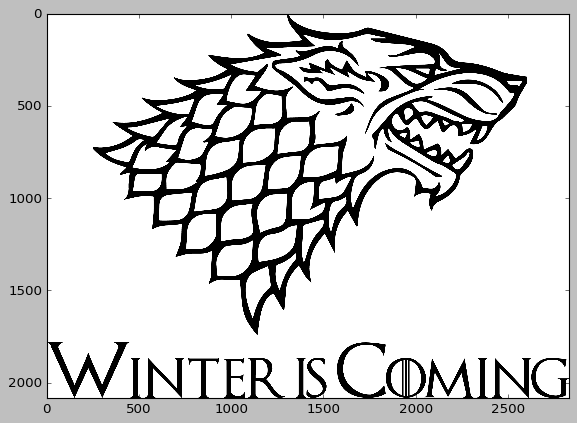

<PIL.Image.Image image mode=LA size=2832x2081 at 0x7FFB5ED3DAD0>


In [ ]:
#imagen 3
plt.style.use('classic')
img3 = Image.open('/content/drive/MyDrive/Colab Notebooks/Actividad Semana 5/Stark.png').convert('LA')

imggray3 = img3.convert('LA')
imgmat3 = np.array(list(imggray3.getdata(band=0)),float)

print(imgmat3)

imgmat3.shape = (imggray3.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat3,cmap='gray')
plt.show()
print(img)

In [ ]:
#obtenemos los las matrices U y V de la imagen3
U3,D3,V3 = np.linalg.svd(imgmat3)
print(imgmat3.shape)
print(U3.shape)
print(V3.shape)

(2081, 2832)
(2081, 2081)
(2832, 2832)


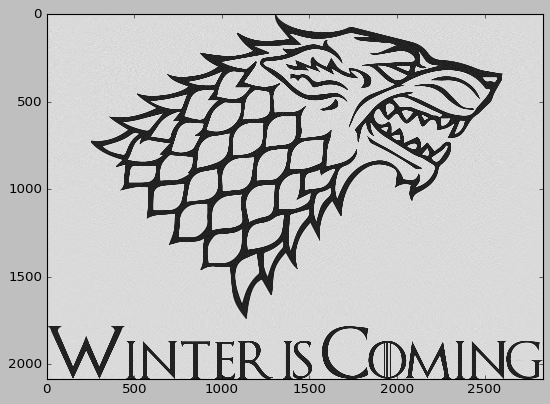

Felicidades la primera imagen está comprimida


In [ ]:
#Este valor es el que nos ayudara a comprimir los pixeles de la imagen3.
nvalue = 300
reconstimg3 = np.matrix(U3[:,:nvalue])*np.diag(D3[:nvalue])*np.matrix(V3[:nvalue,:])
#ve las dimensiones de la imagen3 y su descomposicion
#700x1160= U(2081X2081)D(2081X2832)V(2832x2832)
        #=U(2081Xnvalues)D(nvaluesXnvalue)V(nvaluesx2832)

        #=U(2081X300)(300X300)(300X2831)
plt.imshow(reconstimg3,cmap='gray')
plt.show()
print("Felicidades la primera imagen3 está comprimida")

Imagen Original vs Comprimida 



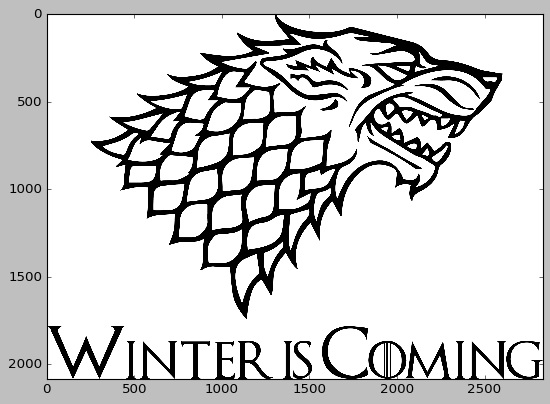

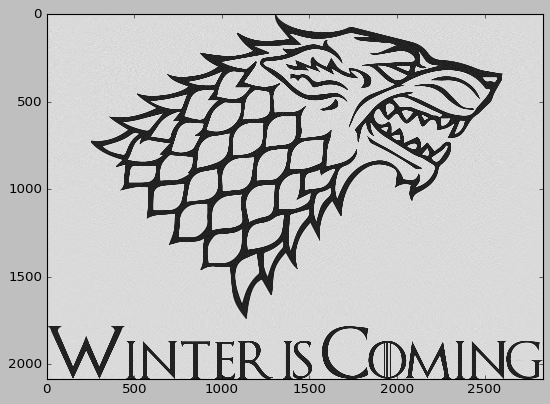

In [ ]:
print("Imagen Original vs Comprimida \n")
plt.imshow(imgmat3,cmap='gray')
plt.show()
plt.imshow(reconstimg3,cmap='gray')
plt.show()

# Ejercicio 3

**Feature importances**

Para este ejercicio, te pediremos que sigas el tutorial de la siguiente pagina:

https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e




In [ ]:
#tu codigo aqui
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
plt.style.use('ggplot')
# Load the data
iris = datasets.load_iris()
X = iris.data
y = iris.target
# Z-score the features
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
# The PCA model
pca = PCA(n_components=2) # estimate only 2 PCs
X_new = pca.fit_transform(X) # project the original data into the PCA space

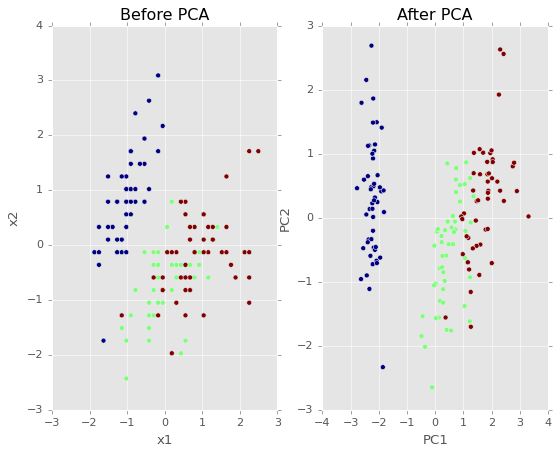

In [ ]:
fig, axes = plt.subplots(1,2)
axes[0].scatter(X[:,0], X[:,1], c=y)
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')
axes[1].scatter(X_new[:,0], X_new[:,1], c=y)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()

In [ ]:
print(pca.explained_variance_ratio_)
# array([0.72962445, 0.22850762])

[0.72962445 0.22850762]


In [ ]:
#covariance matrix 
np.cov(X_new.T)

array([[2.93808505e+00, 5.33928780e-16],
       [5.33928780e-16, 9.20164904e-01]])

In [ ]:
#eigenvalues
pca.explained_variance_

array([2.93808505, 0.9201649 ])

In [ ]:
#most important features
print(abs( pca.components_ ))

[[0.52106591 0.26934744 0.5804131  0.56485654]
 [0.37741762 0.92329566 0.02449161 0.06694199]]


In [ ]:
def biplot(score, coeff , y):
    '''
    Author: Serafeim Loukas, serafeim.loukas@epfl.ch
    Inputs:
       score: the projected data
       coeff: the eigenvectors (PCs)
       y: the class labels
   '''
    xs = score[:,0] # projection on PC1
    ys = score[:,1] # projection on PC2
    n = coeff.shape[0] # number of variables
    plt.figure(figsize=(10,8), dpi=100)
    classes = np.unique(y)
    colors = ['g','r','y']
    markers=['o','^','x']
    for s,l in enumerate(classes):
        plt.scatter(xs[y==l],ys[y==l], c = colors[s], marker=markers[s]) # color based on group
    for i in range(n):
        #plot as arrows the variable scores (each variable has a score for PC1 and one for PC2)
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'k', alpha = 0.9,linestyle = '-',linewidth = 1.5, overhang=0.2)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'k', ha = 'center', va = 'center',fontsize=10)

    plt.xlabel("PC{}".format(1), size=14)
    plt.ylabel("PC{}".format(2), size=14)
    limx= int(xs.max()) + 1
    limy= int(ys.max()) + 1
    plt.xlim([-limx,limx])
    plt.ylim([-limy,limy])
    plt.grid()
    plt.tick_params(axis='both', which='both', labelsize=14)

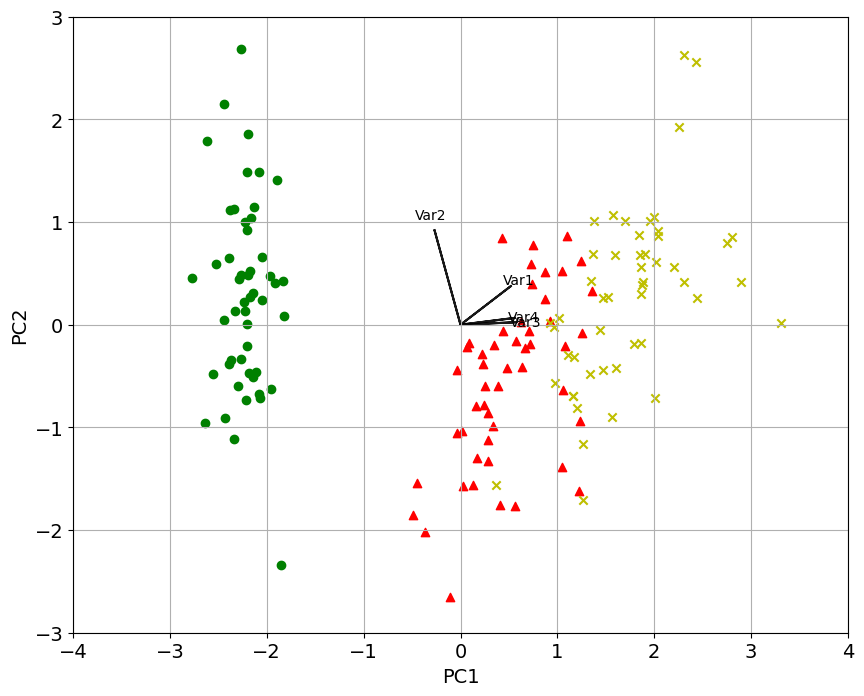

In [ ]:
plt.rcParams.update(plt.rcParamsDefault) # reset ggplot style
# Call the biplot function for only the first 2 PCs
biplot(X_new[:,0:2], np.transpose(pca.components_[0:2, :]), y)
plt.show()

In [ ]:
# Var 3 and Var 4 are extremely positively correlated
np.corrcoef(X[:,2], X[:,3])[1,0]

0.9628654314027957

In [ ]:
# Var 2and Var 3 are negatively correlated
np.corrcoef(X[:,1], X[:,2])[1,0]

-0.42844010433054014

Describe lo relevante del ejercicio y que descubriste de las variables análizadas. 

# **¿Qué es feature importance y para que nos sirve?**

El feature importance hace referencia a las técnicas que calculan una puntuación para todas las características de entrada para un modelo a tratar; las puntuaciones simplemente representan la el valor general de cada característica. Una puntuación más alta significa que la característica específica tendrá un mayor efecto en el modelo que se utiliza para predecir una determinada variable.

Tomemos un ejemplo de la vida real para una mejor comprensión. Suponga que tiene que comprar una casa nueva cerca de su lugar de trabajo. Al comprar una casa, puede pensar en diferentes factores. El feature importance hace su toma de decisiones podría ser la ubicación de la propiedad, por lo que probablemente solo busque casas que estén cerca de su lugar de trabajo. El Feature Importance, funciona de manera similar, al tomar la importancia de las características toma un funcionamiento similar, ya que este clasificará según el efecto que tengan en la predicción del modelo.

# **¿Qué hallazgos fueron los más relevantes durante el análisis del ejercicio?**



Desde mi personal perspectiva, me encantó el manejo de las imágenes, creo que el hecho de aplicar métodos estadísticos al tratamiento de imágenes, como estas se comprimen, como bajar resolución para ahorrar espacio en memoria, etc. Es un claro ejemplo de como estas simples herramientas matemáticas nos ayudan en aplicaciones del mundo real y con este acervo de herramientas podemos seguir explorando posibilidades de como seguir actuando para problemas futuros.

# **¿Dónde lo aplicarías o te sería de utilidad este conocimiento?**

Definitivamente el PCA y SVD. Desde una perspectiva simplificada, PCA transforma los datos linealmente en nuevas propiedades que no están correlacionadas entre sí. Para ML, posicionar PCA como extracción de características puede permitirnos explorar su potencial mejor que la reducción de dimensiones. La descomposición de valores singulares o SVD es un método de factorización de matrices utilizado en muchas aplicaciones numéricas de álgebra lineal como PCA. Esta técnica mejora nuestra comprensión de cuáles son los componentes principales y proporciona un marco computacional sólido que nos permite calcularlos con precisión para más conjuntos de datos.Aunque en papel ambas suenan a lo mismo, cada una tiene características particulares que obviamente son aplicables en un sin fin de algoritmos de ML que queramos explorar o desarrollar

#Referencias:

- Fernández, M. d. (2022). Ciencia y Analítica de datos. Tecnológico de Monterrey.
- Loukas, S. (30 de 05 de 2020). PCA clearly explained —When, Why, How to use it and feature importance: A guide in Python. Obtenido de https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e
- Wang, Z. (16 de 03 de 2019). PCA and SVD explained with numpy. Obtenido de https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8

